📌 Exercício: Implementando Regressão Linear Múltipla do Zero

📢 Objetivo: Expandir o código de Regressão Linear Univariada para suportar múltiplas variáveis preditoras (Regressão Linear Múltipla) e compará-lo com a implementação do scikit-learn.

🔹 Passo 1: Preparando os Dados

📌 Tarefa:

Escolha um dataset com pelo menos 2 ou mais variáveis preditoras (X).

Certifique-se de normalizar os dados para evitar problemas no Gradiente Descendente.

Separe os dados em treino e teste para avaliar a performance do modelo.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Gerando um dataset sintético de preços de imóveis com múltiplas variáveis preditoras
np.random.seed(42)
n = 100

# Criando três variáveis preditoras (Área, Número de Quartos, Idade do Imóvel)
X1 = np.random.randint(50, 300, size=n)  # Área em m²
X2 = np.random.randint(1, 5, size=n)  # Número de Quartos
X3 = np.random.randint(1, 50, size=n)  # Idade do Imóvel

# Criando a variável alvo (Preço do Imóvel)
y = 3000 * X1 + 10000 * X2 - 5000 * X3 + np.random.normal(0, 20000, size=n)

# Montando o DataFrame
df = pd.DataFrame({'Área (m²)': X1, 'Nº Quartos': X2, 'Idade (anos)': X3, 'Preço (R$)': y})

# Separando em treino e teste
X = df[['Área (m²)', 'Nº Quartos', 'Idade (anos)']].values
y = df['Preço (R$)'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


📌 Perguntas para reflexão:

1️⃣ Por que normalizamos os dados antes de aplicar a Regressão Linear?

2️⃣ Como podemos interpretar os coeficientes de um modelo com múltiplas variáveis?

🔹 Prática 1: Entendendo os Dados (Básico)
📌 Objetivo: Explorar os dados antes de treinar o modelo.

📌 Tarefa:

Imprima o shape e os primeiros cinco registros do dataset.

Verifique se as variáveis possuem valores faltantes ou outliers suspeitos.

Faça um gráfico de dispersão para visualizar a relação entre as variáveis.

import seaborn as sns

sns.pairplot(df)  # Criar gráficos de dispersão para todas as variáveis

plt.show()

📌 Perguntas para reflexão:

1️⃣ Alguma variável parece fortemente correlacionada com o preço?

2️⃣ Existem outliers que podem afetar a regressão?

In [15]:
df

,Área (m²),Nº Quartos,Idade (anos),Preço (R$)
0,152,2,32,305276.797996
1,229,2,4,708930.577130
2,142,4,30,324560.256820
3,64,2,37,-22393.977301
4,156,3,23,392639.582780
...,...,...,...,...
95,240,3,20,639781.110654
96,195,4,36,469207.972663
97,267,3,19,732975.280690
98,93,1,26,151509.568818



🔹 Passo 2: Implementando a Regressão Linear Múltipla Manualmente

📌 Tarefa:

Expanda a implementação original da Regressão Linear Univariada para suportar múltiplos atributos preditivos.

Implemente o Gradiente Descendente para atualizar todos os coeficientes simultaneamente.

In [16]:
# Função de custo (MSE)
def custo_mse(y_real, y_pred):
    """
    Calcula o erro médio quadrático (MSE).
    """
    return np.mean((y_real - y_pred) ** 2)

# Função de Gradiente Descendente para Regressão Linear Múltipla
def gradiente_descendente(X, y, theta, taxa_aprendizado, epochs):
    """
    Implementa o Gradiente Descendente para ajustar os coeficientes da regressão múltipla.
    
    Parâmetros:
    - X: Matriz de atributos preditivos (normalizados)
    - y: Variável alvo
    - theta: Vetor de coeficientes iniciais
    - taxa_aprendizado: Taxa de aprendizado (alpha)
    - epochs: Número de iterações

    Retorna:
    - theta atualizado
    - Histórico do erro ao longo das iterações
    """
    m = len(y)  # Número de amostras
    historico_erro = []

    for i in range(epochs):
        y_pred = X.dot(theta)  # Previsão usando os coeficientes atuais
        erro = y_pred - y  # Diferença entre previsão e valor real
        
        # Atualização dos coeficientes usando Gradiente Descendente
        theta -= (taxa_aprendizado / m) * X.T.dot(erro)

        # Cálculo do erro atual e armazenando no histórico
        custo = custo_mse(y, y_pred)
        historico_erro.append(custo)

        if i % 100 == 0:
            print(f"Epoch {i}: Custo = {custo:.4f}")

    return theta, historico_erro


📌 O que esse código faz?

✅ Atualiza todos os coeficientes de uma regressão múltipla ao mesmo tempo.

✅ Usa Gradiente Descendente para minimizar o erro.

✅ Retorna os coeficientes ajustados e o histórico de erro ao longo do treinamento.

🔹 Passo 3: Treinando o Modelo Manualmente

📌 Tarefa:

Inicialize os coeficientes e treine o modelo usando Gradiente Descendente.
    
Visualize a convergência do erro ao longo das iterações.

Epoch 0: Custo = 237447288210.4694
Epoch 100: Custo = 31623217327.4400
Epoch 200: Custo = 4618408926.5862
Epoch 300: Custo = 996161971.8093
Epoch 400: Custo = 499596330.3069
Epoch 500: Custo = 429987766.1196
Epoch 600: Custo = 419998465.6793
Epoch 700: Custo = 418528810.9576
Epoch 800: Custo = 418306861.5064
Epoch 900: Custo = 418272431.4587

Coeficientes finais do modelo manual:
[427048.99174007 216880.00454034  15364.52892888 -72829.85529677]


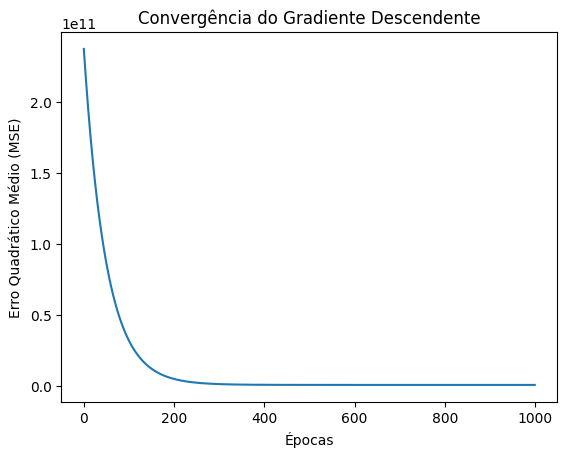

In [17]:
# Adicionando o termo de bias (X0 = 1)
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Adiciona coluna de 1s para intercepto
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Inicializando os coeficientes com zeros
theta_inicial = np.zeros((X_train_bias.shape[1], 1))

# Definindo hiperparâmetros
taxa_aprendizado = 0.01
epochs = 1000

# Treinando o modelo manualmente
theta_final, historico_erro = gradiente_descendente(X_train_bias, y_train, theta_inicial, taxa_aprendizado, epochs)

print("\nCoeficientes finais do modelo manual:")
print(theta_final.flatten())

# Visualizando a convergência do erro
plt.plot(range(epochs), historico_erro)
plt.xlabel("Épocas")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.title("Convergência do Gradiente Descendente")
plt.show()


🔹 Prática 2: Ajustando a Taxa de Aprendizado

📌 Objetivo: Experimentar diferentes taxas de aprendizado no Gradiente Descendente.


📌 Tarefa:


Rode o Gradiente Descendente com diferentes valores de taxa de aprendizado (alpha).

Plote o gráfico da função de custo para comparar os resultados.

📌 Dica:

Epoch 0: Custo = 418266946.8518
Epoch 100: Custo = 418266770.6405
Epoch 200: Custo = 418266623.4329
Epoch 300: Custo = 418266500.4268
Epoch 400: Custo = 418266397.6198
Epoch 500: Custo = 418266311.6754
Epoch 600: Custo = 418266239.8118
Epoch 700: Custo = 418266179.7087
Epoch 800: Custo = 418266129.4306
Epoch 900: Custo = 418266087.3623
Epoch 0: Custo = 418266052.1557
Epoch 100: Custo = 418265901.3118
Epoch 200: Custo = 418265875.5900
Epoch 300: Custo = 418265871.1290
Epoch 400: Custo = 418265870.3445
Epoch 500: Custo = 418265870.2051
Epoch 600: Custo = 418265870.1801
Epoch 700: Custo = 418265870.1755
Epoch 800: Custo = 418265870.1747
Epoch 900: Custo = 418265870.1746
Epoch 0: Custo = 418265870.1745
Epoch 100: Custo = 418265870.1745
Epoch 200: Custo = 418265870.1745
Epoch 300: Custo = 418265870.1745
Epoch 400: Custo = 418265870.1745
Epoch 500: Custo = 418265870.1745
Epoch 600: Custo = 418265870.1745
Epoch 700: Custo = 418265870.1745
Epoch 800: Custo = 418265870.1745
Epoch 900: Custo = 4

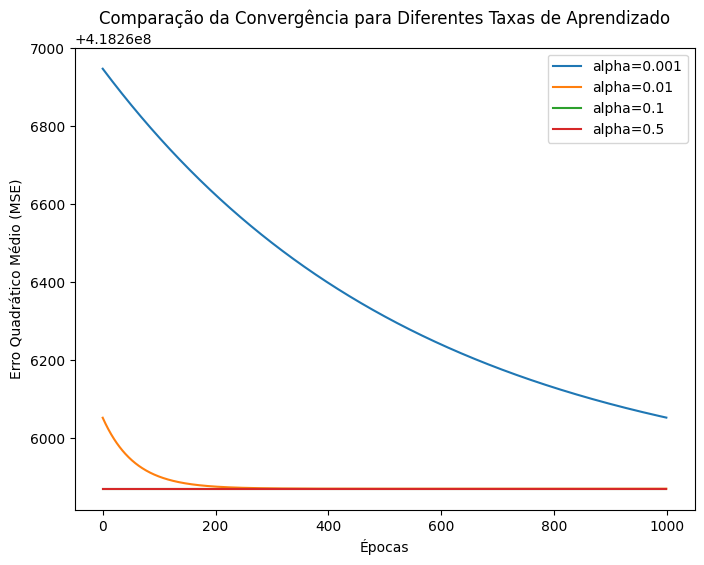

In [18]:
taxas_aprendizado = [0.001, 0.01, 0.1, 0.5]  # Teste diferentes valores
erros = {}

for alpha in taxas_aprendizado:
    theta_temp, erro_temp = gradiente_descendente(X_train_bias, y_train, theta_inicial, alpha, epochs)
    erros[alpha] = erro_temp

# Comparando os erros
plt.figure(figsize=(8,6))
for alpha, erro in erros.items():
    plt.plot(range(epochs), erro, label=f"alpha={alpha}")

plt.xlabel("Épocas")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.title("Comparação da Convergência para Diferentes Taxas de Aprendizado")
plt.legend()
plt.show()


📌 Perguntas para reflexão:

1️⃣ O erro diminui ao longo do tempo? O modelo está convergindo?

2️⃣ O que acontece se mudarmos a taxa de aprendizado?

🔹 Passo 4: Comparando com sklearn

📌 Tarefa:

Treine um modelo de Regressão Linear Múltipla com o sklearn.
    
Compare os coeficientes encontrados manualmente e pelo sklearn.

In [10]:
# Adicionando o termo de bias corretamente (X0 = 1)
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Adiciona coluna de 1s para intercepto
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Inicializando os coeficientes com zeros
theta_inicial = np.zeros((X_train_bias.shape[1], 1))

# Definindo hiperparâmetros
taxa_aprendizado = 0.01
epochs = 1000

# Treinando o modelo manualmente
theta_final, historico_erro = gradiente_descendente(X_train_bias, y_train.reshape(-1, 1), theta_inicial, taxa_aprendizado, epochs)

print("\nCoeficientes finais do modelo manual:")
print(theta_final.flatten())


Epoch 0: Custo = 237447288210.4694
Epoch 100: Custo = 31623217327.4400
Epoch 200: Custo = 4618408926.5862
Epoch 300: Custo = 996161971.8093
Epoch 400: Custo = 499596330.3069
Epoch 500: Custo = 429987766.1196
Epoch 600: Custo = 419998465.6793
Epoch 700: Custo = 418528810.9576
Epoch 800: Custo = 418306861.5064
Epoch 900: Custo = 418272431.4587

Coeficientes finais do modelo manual:
[427048.99174007 216880.00454034  15364.52892888 -72829.85529677]


📌 Perguntas para reflexão:

1️⃣ Os coeficientes encontrados manualmente e pelo sklearn são semelhantes?

2️⃣ Qual modelo treinou mais rápido?

3️⃣ Se os coeficientes forem diferentes, o que pode estar causando essa diferença?